In [0]:
# pip install noisereduce

In [0]:
# #!/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on Fri Jan 10 16:40:40 2020

# @author: gtsal
# """
# #Na to doume gia noise reduction mipos k ginei tpt kalutero 

# import noisereduce as nr# Load audio file # first pip install noisereduce
# import numpy as np
# import librosa
# import matplotlib.pyplot as plt

# # Plot audio with zoomed in y axis
# def plotAudio(output):
#     fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,10))
#     plt.plot(output, color='blue')
#     ax.set_xlim((0, len(output)))
#     ax.margins(2, -0.1)
#     plt.show()


# folder = "Respiratory_Sound_Database/Respiratory_Sound_Database/"
    
# subfolder =folder  +'audio_and_txt_files/'

# audio_data, sampling_rate = librosa.load(subfolder+'101_1b1_Al_sc_Meditron.wav')# Noise reduction
# noisy_part = audio_data[0:25000]  
# reduced_noise = nr.reduce_noise(audio_clip=audio_data, noise_clip=noisy_part, verbose=False)# Visualize
# print("Original audio file:")
# plotAudio(audio_data)
# print("Noise removed audio file:")
# plotAudio(reduced_noise)

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"giorgostsalidis","key":"135f219681fd8294a29353efc72db54e"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 910, in dataset_list_cli
    tag_ids, search, user, mine, page)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 880, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 66, in __init__
    self.size = File.get_size(self.totalBytes)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 97, in get_size
    return '%.*f%s' % (precision, size, suffixes[suffix_index])
TypeError: float argument required, not NoneType


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d vbookshelf/respiratory-sound-database # api copied from kaggle

100% 3.68G/3.69G [01:14<00:00, 22.7MB/s]
100% 3.69G/3.69G [01:14<00:00, 52.8MB/s]


In [0]:
!cd  /content


In [0]:
!ls

kaggle.json  respiratory-sound-database.zip  sample_data


In [0]:
!mkdir data-respiratory

In [0]:
! unzip respiratory-sound-database.zip -d data-respiratory

Archive:  respiratory-sound-database.zip
  inflating: data-respiratory/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.txt  
  inflating: data-respiratory/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav  
  inflating: data-respiratory/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.txt  
  inflating: data-respiratory/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.wav  
  inflating: data-respiratory/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.txt  
  inflating: data-respiratory/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.wav  
  inflating: data-respiratory/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.txt  
  inflating: data-respirator

In [0]:
!ls

data-respiratory  kaggle.json  respiratory-sound-database.zip  sample_data


In [0]:
data_dir = '/content/data-respiratory/'

In [0]:
cd /content/data-respiratory/

/content/data-respiratory


In [0]:
ls

demographic_info.txt  respiratory_sound_database/  Respiratory_Sound_Database/


In [0]:
#SoundSP

import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline


from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


def load_data(file):
    df_no_diagnosis = pd.read_csv('demographic_info.txt', names = 
                 ['Patient number', 'Age', 'Sex' , 'Adult BMI (kg/m2)', 'Child Weight (kg)' , 'Child Height (cm)'],
                 delimiter = ' ')
    diagnosis = pd.read_csv(file+'patient_diagnosis.csv',
                        names = ['Patient number', 'Diagnosis'])
    

    df =  df_no_diagnosis.join(diagnosis.set_index('Patient number'),
                           on = 'Patient number', how = 'left')
    root =file+'audio_and_txt_files/'
    filenames = [s.split('.')[0] for s in os.listdir(path = root) if '.txt' in s]
    i_list = []
    rec_annotations = []
    rec_annotations_dict = {}
    for s in filenames:
        (i,a) = Extract_Annotation_Data(s, root)
        i_list.append(i)
        rec_annotations.append(a)
        rec_annotations_dict[s] = a
    recording_info = pd.concat(i_list, axis = 0)
    no_label_list = []
    crack_list = []
    wheeze_list = []
    both_sym_list = []
    filename_list = []
    for f in filenames:
        d = rec_annotations_dict[f]
        no_labels = len(d[(d['Crackles'] == 0) & (d['Wheezes'] == 0)].index)
        n_crackles = len(d[(d['Crackles'] == 1) & (d['Wheezes'] == 0)].index)
        n_wheezes = len(d[(d['Crackles'] == 0) & (d['Wheezes'] == 1)].index)
        both_sym = len(d[(d['Crackles'] == 1) & (d['Wheezes'] == 1)].index)
        no_label_list.append(no_labels)
        crack_list.append(n_crackles)
        wheeze_list.append(n_wheezes)
        both_sym_list.append(both_sym)
        filename_list.append(f)
    file_label_df = pd.DataFrame(data = {'filename':filename_list, 'no label':no_label_list,
                                         'crackles only':crack_list,
                                         'wheezes only':wheeze_list,
                                         'crackles and wheezees':both_sym_list})
    w_labels = file_label_df[(file_label_df['crackles only'] != 0) | (file_label_df['wheezes only'] != 0) | (file_label_df['crackles and wheezees'] != 0)]

    return df,recording_info,w_labels,
    
def Extract_Annotation_Data(file_name, root):
    tokens = file_name.split('_')
    recording_info = pd.DataFrame(data = [tokens], columns = ['Patient number', 'Recording index', 'Chest location','Acquisition mode','Recording equipment'])
    recording_annotations = pd.read_csv(os.path.join(root, file_name + '.txt'), names = ['Start', 'End', 'Crackles', 'Wheezes'], delimiter= '\t')
    return (recording_info, recording_annotations)


def load_sound_files(file_paths):
    raw_sounds = []
    raw_sr = []
    for fp in file_paths:
        sr,X = read_wav_file(fp,22050)
        raw_sr.append(sr)
        raw_sounds.append(X)
    return raw_sounds,raw_sr

def plot_waves(raw_sounds,raw_sr):
    i = 1
    #fig = plt.figure(figsize=(8,20))
            #plt.subplot(1,1,i)
    fig = plt.figure(figsize=(20,20))
    librosa.display.waveplot(raw_sounds,sr=raw_sr)
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=7)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds,raw_sr):
    i = 1
    #fig = plt.figure(figsize=(8,20))
    for n,f,s in zip(sound_names,raw_sounds,raw_sr):
        #plt.subplot(len(sound_names),1,i)
        fig = plt.figure(figsize=(20,20))
        specgram(np.array(f), Fs=s)
        plt.title(n.title(),fontsize=12)
        plt.savefig('plots/spectrograms/'+str(100+i)+'_'+n+'_SpecGram.png')  
        plt.close()     
        i += 1

    #plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=7)
   # plt.show()

def plot_log_power_specgram(raw_sounds,raw_sr):
    #fig = plt.figure(figsize=(8,20))
    fig = plt.figure(figsize=(20,20))
    D = librosa.core.amplitude_to_db(np.abs(librosa.stft(raw_sounds))**2, ref=np.max)
    librosa.display.specshow(D,x_axis='time' ,y_axis='log')
    del D    
#    plt.suptitle("Figure 3: Log power spectrogram",x=0.5, y=0.915,fontsize=7)
    plt.show()

def extract_feature(X,sample_rate):
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=100).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    result=mfccs.copy()
    result=np.hstack((result,chroma,mel,contrast,tonnetz))
    #data.append([mfccs,chroma,mel,contrast,tonnetz])
    return result
    #return data

def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
              mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            except Exception as e:
              print ("Error encountered while parsing file: ", fn)
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[2].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [0]:
import wave
import math
import scipy.io.wavfile as wf
import numpy as np
#wave file reader

#Will resample all files to the target sample rate and produce a 32bit float array
def read_wav_file(str_filename, target_rate):
    wav = wave.open(str_filename, mode = 'r')
    (sample_rate, data) = extract2FloatArr(wav,str_filename)
    
    if (sample_rate != target_rate):
        ( _ , data) = resample(sample_rate, data, target_rate)
        
    wav.close()
    return (target_rate, data.astype(np.float32))

def resample(current_rate, data, target_rate):
    x_original = np.linspace(0,100,len(data))
    x_resampled = np.linspace(0,100, int(len(data) * (target_rate / current_rate)))
    resampled = np.interp(x_resampled, x_original, data)
    return (target_rate, resampled.astype(np.float32))

# -> (sample_rate, data)
def extract2FloatArr(lp_wave, str_filename):
    (bps, channels) = bitrate_channels(lp_wave)
    
    if bps in [1,2,4]:
        (rate, data) = wf.read(str_filename)
        divisor_dict = {1:255, 2:32768}
        if bps in [1,2]:
            divisor = divisor_dict[bps]
            data = np.divide(data, float(divisor)) #clamp to [0.0,1.0]        
        return (rate, data)
    
    elif bps == 3: 
        #24bpp wave
        return read24bitwave(lp_wave)
    
    else:
        raise Exception('Unrecognized wave format: {} bytes per sample'.format(bps))
        
#Note: This function truncates the 24 bit samples to 16 bits of precision
#Reads a wave object returned by the wave.read() method
#Returns the sample rate, as well as the audio in the form of a 32 bit float numpy array
#(sample_rate:float, audio_data: float[])
def read24bitwave(lp_wave):
    nFrames = lp_wave.getnframes()
    buf = lp_wave.readframes(nFrames)
    reshaped = np.frombuffer(buf, np.int8).reshape(nFrames,-1)
    short_output = np.empty((nFrames, 2), dtype = np.int8)
    short_output[:,:] = reshaped[:, -2:]
    short_output = short_output.view(np.int16)
    return (lp_wave.getframerate(), np.divide(short_output, 32768).reshape(-1))  #return numpy array to save memory via array slicing

def bitrate_channels(lp_wave):
    bps = (lp_wave.getsampwidth() / lp_wave.getnchannels()) #bytes per sample
    return (bps, lp_wave.getnchannels())

def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data) 
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import wave
import sys
import os
import librosa
import librosa.display



def create_dataframe(folder):
    soundwav = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.wav'):
                soundwav.append(file)
    data = [];
    
    for file in soundwav:
        if file[:3] not in data:
            data.append(file[:3])
    data = sorted(data)
    
    arr = np.array(data)
    
    row =[]
    
    for i in data :
        r1=[]
        for file in soundwav:
            if file[:3]==i:
                r1.append(file)
        row.append(r1)
                
    
    df=pd.DataFrame(row,index=data)
    col = []
    for i in range(1,df.shape[1]+1):
        col.append('soundtrack-'+str(i))
    
    df.columns = col

    return df

def w_c_dataset(df,subfolder):
    files=[]
    lengths=[]
    for i,j in df.iterrows():
        for l in j:
            if(l!=None):
                files.append(subfolder+str(l))
                a=str(l).replace('.wav','.txt')
                tmp=pd.read_csv(subfolder+a,sep='\t',header = None)
                lengths.append(tmp)
                times,labels=frame(lengths)
    sounds = []
    
    [sound,sr] = load_sound_files(files)
    return sound,sr,lengths,times,labels

def encode(line):
    if line[0]==0:
        if line[1]==0:
            return 0
        else: 
            return 2
    if line[0]==1:
        if line[1]==0:
            return 1
        else:
            return 3

def frame(lengths):
    times=[]
    labels=[]
    for df in lengths:
        l=df.iloc[:,0:2]
        l=l.to_numpy();      
        l=l.reshape(1,-1)
        l=np.ceil(l*22050)
        l=l.reshape(int(l.size/2),-1)
        times.append(l)
        # 0 present of crackle 1 present of wheeles 2 both
        #0 0 0 or 0 0 1 or 0 1 0 or 1 0 0
        k=df.iloc[:,2:4]
        k=k.to_numpy()
        z=[]
        for i in k:
            z.append(encode(i))
        z=np.asarray(z)
        z=z.reshape(-1,1)
        labels.append(z)
    return times,labels

def split_sounds(sounds,times,labels):
    s=[]
    l=[]
    for i,sound in enumerate(sounds):
        for t,label in zip(times[i],labels[i]):
            s.append(sound[int(t[0]):int(t[1])])
            if label==0:
                a=np.array([1,0,0,0])
            if label==1:
                a=np.array([0,1,0,0])
            if label==2:
                a=np.array([0,0,1,0])    
            if label==3:
                a=np.array([0,0,0,1])
            l.append(a)
    return s,l

def experiment():
    folder = "/content/data-respiratory/Respiratory_Sound_Database/Respiratory_Sound_Database/"
    
    subfolder =folder  +'audio_and_txt_files/'
    df = create_dataframe(subfolder)
    df=df.rename_axis('ID')
    soundpath=[]
    for i in df.iloc[:,0]:
        soundpath.append(subfolder+i)
    diagnosis = pd.read_csv(folder+'patient_diagnosis.csv', names = ['Patient number', 'Diagnosis'])
    soundtracks=df.count(axis=1)
    #features=ssp.extract_feature(soundpath)
    parent_dir = folder
    tr_sub_dirs = subfolder
    ts_sub_dirs = subfolder+"test/"
    #df2=pd.concat(df[1,:]*5,ignore_index=True)
    #df2=pd.concat(df[7,:]*3,ignore_index=True)
    #df2=pd.concat(df[14,:]*2,ignore_index=True)
    df=df.rename_axis('ID')
    print(df.head(10))
    return df,diagnosis

def split_set(dataset,label,split):
    a=label[label==0]
    d=dataset[label[:,0]==0,:]
    s=np.size(a,0)
    t=int(np.size(a,0)*split)
    x_test = d[t:s,:]
    y_test = a[t:s]
    x_train = d[0:t,:]
    y_train = a[0:t]
    for i in range (1,4):
        a=label[label==i]
        d=dataset[label[:,0]==i,:]
        s=np.size(a,0)
        t=int(np.size(a,0)*split)
        x_test = np.vstack((x_test,d[t:s,:]))
        y_test = np.hstack((y_test,a[t:s]))
        x_train = np.vstack((x_train,d[0:t,:]))
        y_train = np.hstack((y_train,a[0:t]))
    return x_train,y_train,x_test,y_test

In [0]:
folder = "/content/data-respiratory/Respiratory_Sound_Database/Respiratory_Sound_Database/" 
subfolder =folder  +'audio_and_txt_files/'
df,diagnosis = experiment()
[sound,sr,lengths,times,labels] = w_c_dataset(df,subfolder)
[data,label]=split_sounds(sound,times,labels)

                   soundtrack-1  ... soundtrack-66
ID                               ...              
101  101_1b1_Pr_sc_Meditron.wav  ...          None
102  102_1b1_Ar_sc_Meditron.wav  ...          None
103  103_2b2_Ar_mc_LittC2SE.wav  ...          None
104  104_1b1_Ll_sc_Litt3200.wav  ...          None
105  105_1b1_Tc_sc_Meditron.wav  ...          None
106  106_2b1_Pl_mc_LittC2SE.wav  ...          None
107  107_2b3_Tc_mc_AKGC417L.wav  ...          None
108  108_1b1_Al_sc_Meditron.wav  ...          None
109  109_1b1_Pr_sc_Litt3200.wav  ...          None
110  110_1p1_Al_sc_Meditron.wav  ...          None

[10 rows x 66 columns]


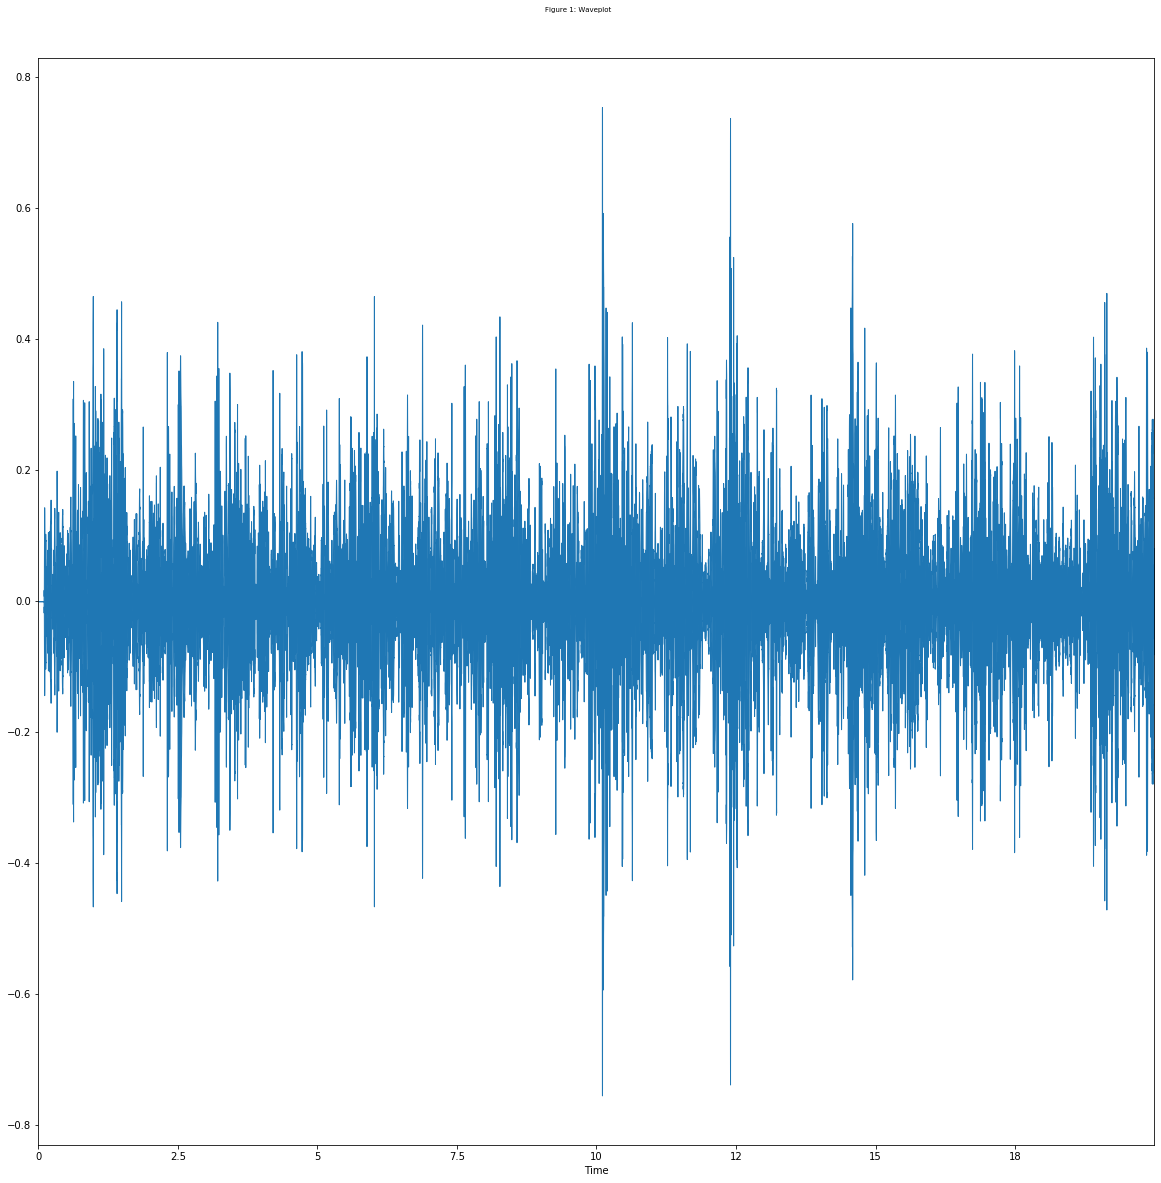

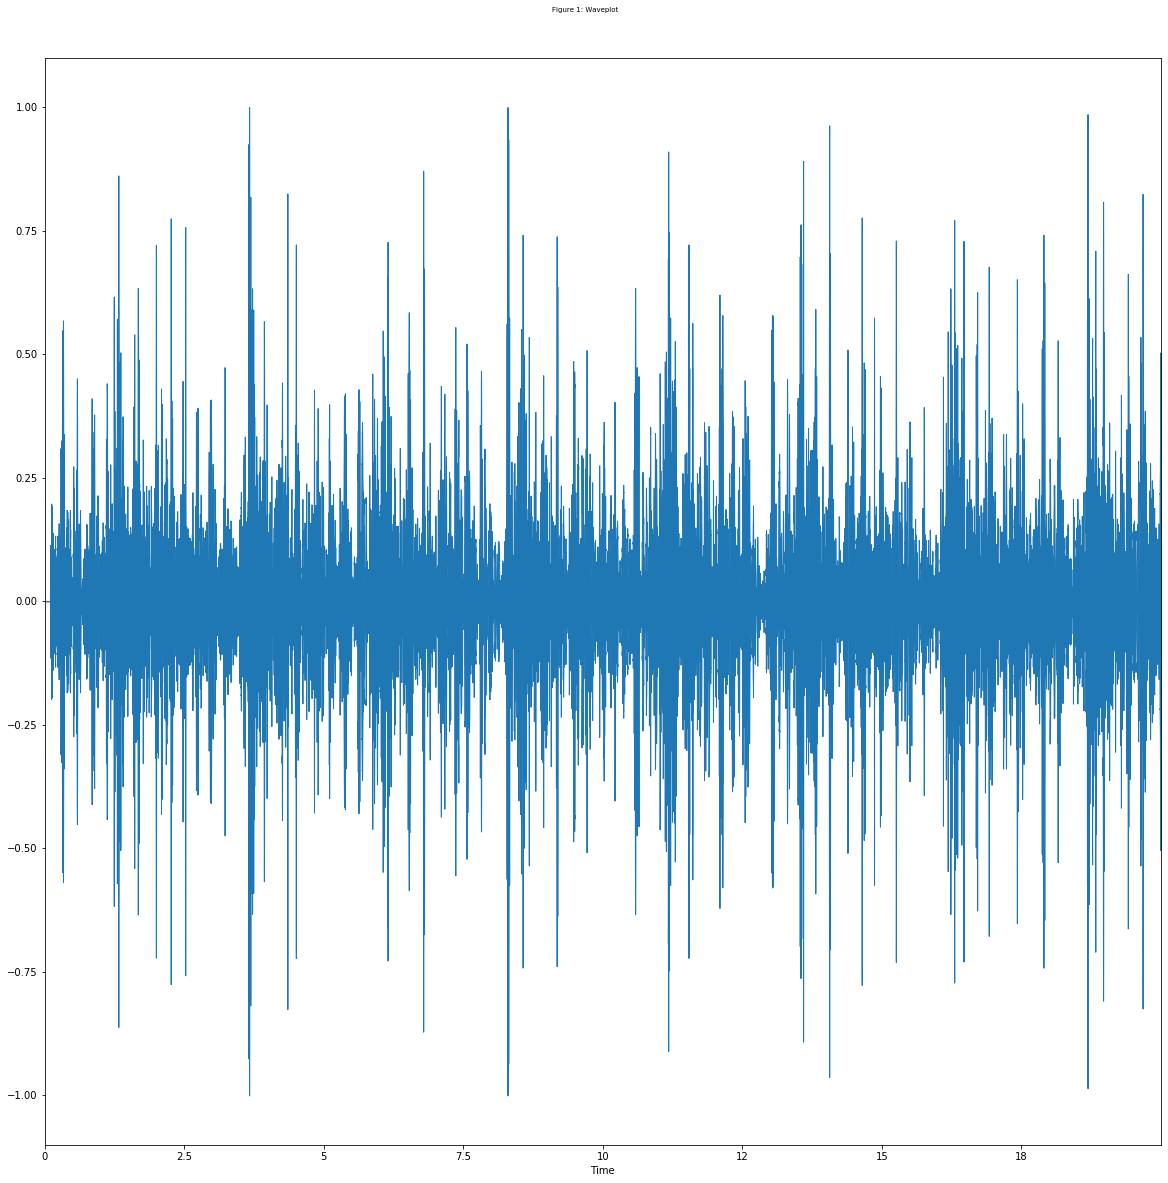

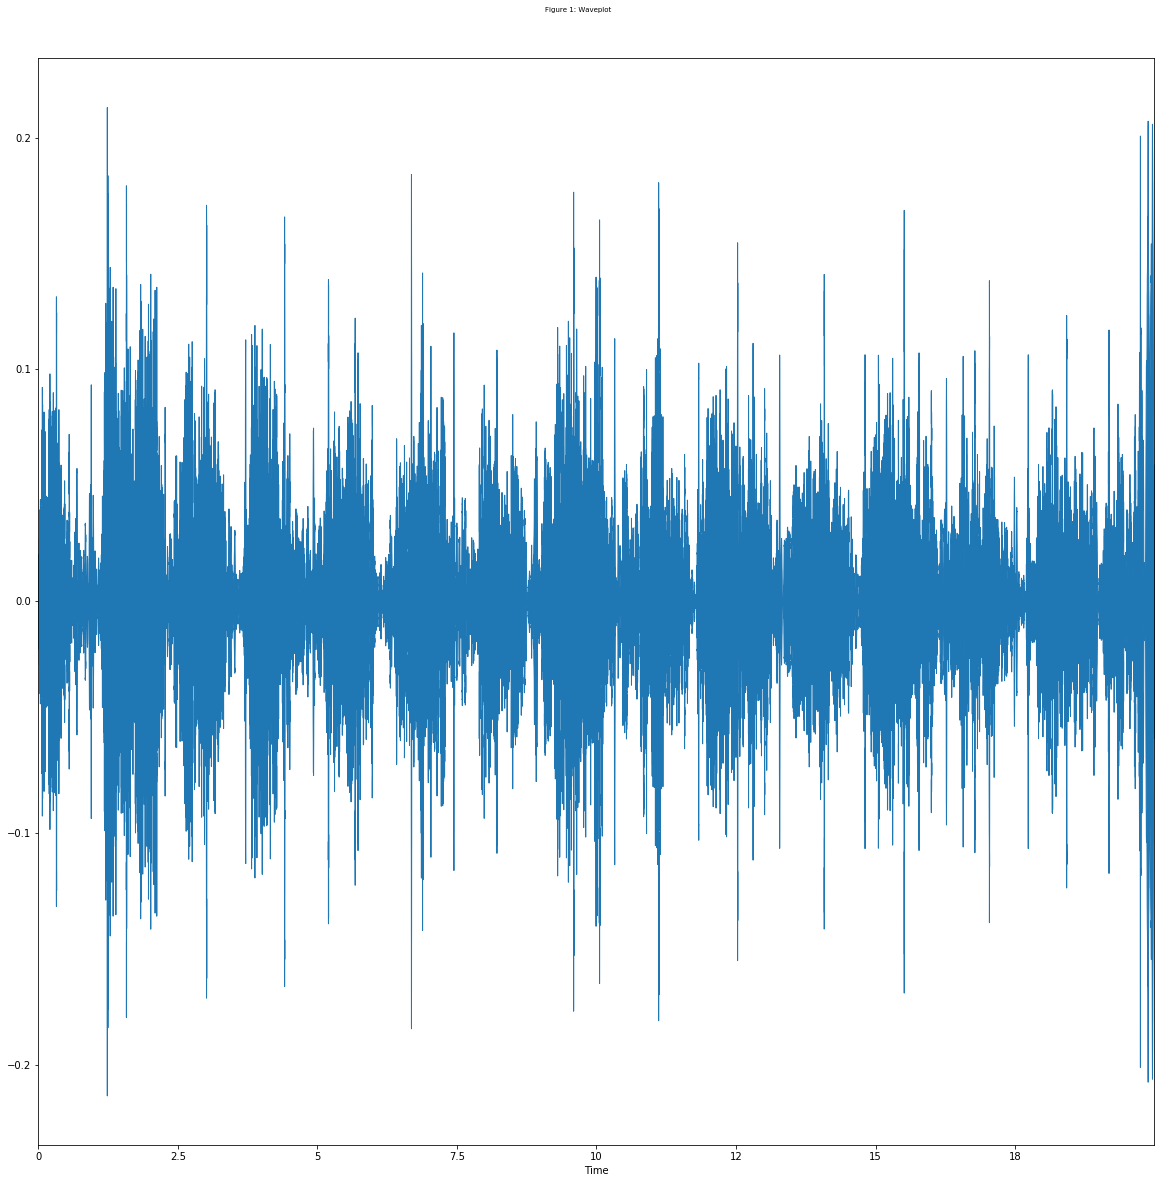

In [0]:
# h label exei ta 4 classes :
# 0 ->None
# 1 ->Crackle 
# 2 ->Wheezes
# 3 ->Both 

plot_waves(sound[16],sr[16])
plot_waves(sound[15],sr[15])
plot_waves(sound[10],sr[10])

In [0]:
dataset = []
for d in data:
    a = extract_feature(d,22050)
    dataset.append(a)

data=np.asarray(dataset)

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [0]:
a=np.vstack(labels[:])
l1=np.zeros(np.size(a,0))
l2=np.zeros(np.size(a,0))
#h labels exei ta label san dianismata 0000 
# h klaseis einai me tn parapanaw sira to None(0,1) Crackle(0,1) Wheezle(0,1) Both(0,1)
for i in range(np.size(a,0)):
    if a[i]==1:
        l1[i]=1
    if a[i]==2:
        l2[i]=1
    if a[i]==3:
        l1[i]=1
        l2[i]=1

In [0]:
#sto l1 kai l2 pernw ksexorista binary provlima gia crackles kai wheezles 

x_train1,y_train1,x_test1,y_test1=split_set(data,l1.reshape(-1,1),0.7) #crackles
x_train2,y_train2,x_test2,y_test2=split_set(data,l2.reshape(-1,1),0.7) #wheezles

In [0]:
print(y_train1)
cn = []
cp = []
for i in range(np.size(y_train1,0)):
    if y_train1[i]==1:
        cp.append(y_train1[i])

    if y_train1[i]==0:
        cn.append(y_train1[i])

print(len(cp))
print(len(cn))

[0. 0. 0. ... 1. 1. 1.]
1659
3169


In [0]:
print(y_train2)
cn = []
cp = []
for i in range(np.size(y_train2,0)):
    if y_train2[i]==1:
        cp.append(y_train2[i])

    if y_train2[i]==0:
        cn.append(y_train2[i])

print(len(cp))
print(len(cn))

[0. 0. 0. ... 1. 1. 1.]
974
3854


In [0]:
#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train1))
sm1 = SMOTE(random_state=42)
x_train1, y_train1 = sm1.fit_resample(x_train1, y_train1)
print('Resampled dataset shape %s' % Counter(y_train1))


print('Original dataset shape %s' % Counter(y_train2))
sm2 = SMOTE(random_state=42)
x_train2, y_train2 = sm2.fit_resample(x_train2, y_train2)
print('Resampled dataset shape %s' % Counter(y_train2))

Original dataset shape Counter({0.0: 3169, 1.0: 1659})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0.0: 3169, 1.0: 3169})
Original dataset shape Counter({0.0: 3854, 1.0: 974})
Resampled dataset shape Counter({0.0: 3854, 1.0: 3854})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
cn = []
cp = []
for i in range(np.size(y_train1,0)):
    if y_train1[i]==1:
        cp.append(y_train1[i])

    if y_train1[i]==0:
        cn.append(y_train1[i])

print(len(cp))
print(len(cn))

3169
3169


In [0]:
cn = []
cp = []
for i in range(np.size(y_train2,0)):
    if y_train2[i]==1:
        cp.append(y_train2[i])

    if y_train2[i]==0:
        cn.append(y_train2[i])

print(len(cp))
print(len(cn))

3854
3854


In [0]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, confusion_matrix, roc_auc_score
from sklearn.svm import SVC

In [0]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [0]:
grid1 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid1.fit(x_train1, y_train1)

NameError: ignored

In [0]:
# print best parameter after tuning 
print(grid1.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid1.best_estimator_)

NameError: ignored

In [0]:
grid_predictions1 = grid1.predict(x_test1) 
  
# print classification report 
print(classification_report(y_test1, grid_predictions1))


In [0]:
model1 = sklearn.svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
model1.fit(x_train1,y_train1)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred1=model1.predict(x_test1)

In [0]:
print("Model1(Crackles model) with SVM f1_score: %f" %f1_score(y_test1, y_pred1, average='weighted', labels=np.unique(y_pred1)))

Model1(Crackles model) with SVM f1_score: 0.559990


In [0]:
print(sklearn.metrics.accuracy_score(y_test1,y_pred1))
print(sklearn.metrics.confusion_matrix(y_test1,y_pred1))
print(sklearn.metrics.classification_report(y_test1, y_pred1))

0.6120772946859904
[[1160  199]
 [ 604  107]]
              precision    recall  f1-score   support

         0.0       0.66      0.85      0.74      1359
         1.0       0.35      0.15      0.21       711

    accuracy                           0.61      2070
   macro avg       0.50      0.50      0.48      2070
weighted avg       0.55      0.61      0.56      2070



In [0]:
print(sklearn.metrics.roc_auc_score(y_test1,y_pred1))

0.5020305325024916


In [0]:
grid2 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid2.fit(x_train2, y_train2)

In [0]:
# print best parameter after tuning 
print(grid2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid2.best_estimator_)

In [0]:
grid_predictions2 = grid2.predict(x_test2) 
  
# print classification report 
print(classification_report(y_test2, grid_predictions2))

In [0]:
model2 = sklearn.svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
model2.fit(x_train2,y_train2)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred2=model2.predict(x_test2)

In [0]:
print("Model2(Wheezles model) with SVM  f1_score: %f" %f1_score(y_test2, y_pred2, average='weighted', labels=np.unique(y_pred2)))

Model2(Wheezles model) with SVM  f1_score: 0.735039


In [0]:
print('Wheezles')
print(sklearn.metrics.accuracy_score(y_test2,y_pred2))
print(sklearn.metrics.confusion_matrix(y_test2,y_pred2))
print(sklearn.metrics.classification_report(y_test2, y_pred2))
print(sklearn.metrics.roc_auc_score(y_test2,y_pred2))

Wheezles
0.7782608695652173
[[1555   97]
 [ 362   56]]
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      1652
         1.0       0.37      0.13      0.20       418

    accuracy                           0.78      2070
   macro avg       0.59      0.54      0.53      2070
weighted avg       0.72      0.78      0.74      2070

0.5376272924221185


In [0]:
#======================================================== Linear, Logistic Regression And LDA ========================================================

In [0]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
import warnings

In [0]:
#Custom print function to show results of errors in 
def print_errors(y_true, y_pred, model = ""): 
    if(model!=""):
        print("For model " + str(model))
    print("Mean absolute error: " + str(mean_absolute_error(y_true, y_pred)))
    print("Mean squared error: " + str(mean_squared_error(y_true, y_pred)))

In [0]:
#Run the Ordinary Least Squares regression for Crackles

olsr1 = linear_model.LinearRegression().fit(x_train1,y_train1)
y_pred1 = olsr1.predict(x_test1)

#Show errors for Ordinary Least Squares regression
print_errors(y_test1, y_pred1.round(), "(Crackles) Ordinary Least Squares regression")

print(accuracy_score(y_test1,y_pred1.round())) #genika epeidh einai regression k oxi classification to kano .round() gia na pernoume to pio kontino sto 0 h 1 

For model (Crackles) Ordinary Least Squares regression
Mean absolute error: 0.46908212560386475
Mean squared error: 0.5608695652173913
0.5589371980676329


In [0]:
print(sklearn.metrics.roc_auc_score(y_test1,y_pred1))

0.5582743164546613


In [0]:
#df = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_pred1.round().flatten()})
#df

In [0]:
#Run the Ordinary Least Squares regression for Wheezles

olsr2 = linear_model.LinearRegression().fit(x_train2,y_train2)
y_pred2 = olsr2.predict(x_test2)

#Show errors for Ordinary Least Squares regression
print_errors(y_test2, y_pred2.round(), "(Wheezles) Ordinary Least Squares regression")

print(accuracy_score(y_test2,y_pred2.round())) #genika epeidh einai regression k oxi classification to kano .round() gia na pernoume to pio kontino sto 0 h 1 

For model (Wheezles) Ordinary Least Squares regression
Mean absolute error: 0.3560386473429952
Mean squared error: 0.39758454106280194
0.6594202898550725


In [0]:
#Helper function for testing different values of alpha on the model we want
def getResults(X_train, y_train, X_test, y_test, a, model):
    if(model == "Ridge"):
        ridge = linear_model.Ridge(alpha=a)
        ridge.fit(X_train,y_train)
        Y_pred = ridge.predict(X_test)
        ridge_mae = mean_absolute_error(y_test, Y_pred)
        ridge_mse = mean_squared_error(y_test, Y_pred)
        return ridge_mae, ridge_mse
    elif(model == "LASSO"):
        lasso = linear_model.Lasso(alpha=a)
        lasso.fit(X_train,y_train)
        Y_pred = lasso.predict(X_test)
        lasso_mae = mean_absolute_error(y_test, Y_pred)
        lasso_mse = mean_squared_error(y_test, Y_pred)
        return lasso_mae, lasso_mse

In [0]:
#Run Ridge Regression on various values of a in a range[0,100] every 1 for Crackles
mse1=[]
mae1=[]
alfa=[]
for a in [x * 1 for x in range(0, 100)]:
    ridge_mae1, ridge_mse1 = getResults(x_train1,y_train1,x_test1,y_test1,a, "Ridge")
    mse1.append(ridge_mse1)
    mae1.append(ridge_mae1)
    alfa.append(a)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.74011e-17): result may not be accurate.
  overwrite_a=True).T


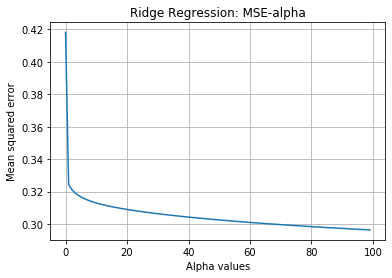

In [0]:
#Evaluate Ridge Regression with Mean squared error
plt.plot(alfa,mse1)
plt.title("Ridge Regression: MSE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean squared error")
plt.grid()
plt.show()

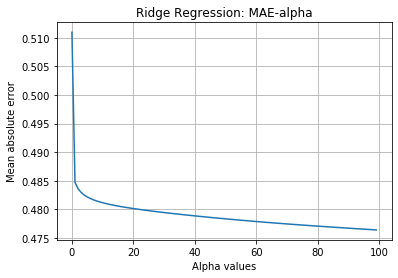

In [0]:
#Evaluate Ridge Regression with Mean absolute error
plt.plot(alfa,mae1)
plt.title("Ridge Regression: MAE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean absolute error")
plt.grid()
plt.show()

In [0]:
# Find alpha for min MSE and run lasso for this alpha.
idx_min1=mse1.index(min(mse1[1:100]))
print(alfa[idx_min1])

99


In [0]:
#Run the  Ridge Regression or Tikhonov regularization for Crackles
ridge1 = linear_model.Ridge(alpha=alfa[idx_min1],normalize=True)
ridge1.fit(x_train1,y_train1) # Fit a ridge regression on the training data
y_pred1=ridge1.predict(x_test1)  # Use this model to predict the test data

#Show errors for Ordinary Least Squares regression
print_errors(y_test1, y_pred1, "Ridge Regression") #Print the test errors

print(accuracy_score(y_test1,y_pred1.round())) #genika epeidh einai regression k oxi classification to kano .round() gia na pernoume to pio kontino sto 0 h 1 

For model Ridge Regression
Mean absolute error: 0.49594133092096976
Mean squared error: 0.24657164557081498
0.5859903381642512


In [0]:
#Run Ridge Regression on various values of a in a range[0,100] every 1 for Wheezles
mse2=[]
mae2=[]
alfa=[]
for a in [x * 1 for x in range(0, 100)]:
    ridge_mae2, ridge_mse2 = getResults(x_train2,y_train2,x_test2,y_test2,a, "Ridge")
    mse2.append(ridge_mse2)
    mae2.append(ridge_mae2)
    alfa.append(a)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.73471e-17): result may not be accurate.
  overwrite_a=True).T


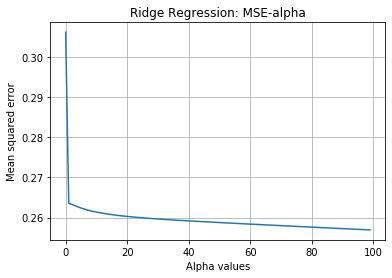

In [0]:
#Evaluate Ridge Regression with Mean squared error
plt.plot(alfa,mse2)
plt.title("Ridge Regression: MSE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean squared error")
plt.grid()
plt.show()

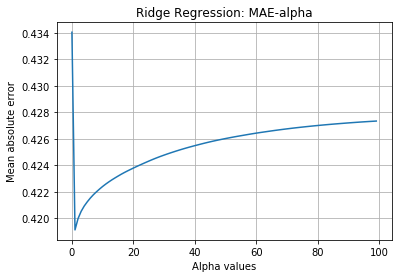

In [0]:
#Evaluate Ridge Regression with Mean absolute error
plt.plot(alfa,mae2)
plt.title("Ridge Regression: MAE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean absolute error")
plt.grid()
plt.show()

In [0]:
# Find alpha for min MSE and run lasso for this alpha.
idx_min2=mse2.index(min(mse2[1:100]))


In [0]:
#Run the  Ridge Regression or Tikhonov regularization for Wheezles
ridge2 = linear_model.Ridge(alpha=alfa[idx_min2],normalize=True)
ridge2.fit(x_train2,y_train2) # Fit a ridge regression on the training data
y_pred1=ridge1.predict(x_test2)  # Use this model to predict the test data

#Show errors for Ordinary Least Squares regression
print_errors(y_test2, y_pred2, "Ridge Regression") #Print the test errors

print(accuracy_score(y_test2,y_pred2.round())) #genika epeidh einai regression k oxi classification to kano .round() gia na pernoume to pio kontino sto 0 h 1 

For model Ridge Regression
Mean absolute error: 0.434041344271937
Mean squared error: 0.3061377094564552
0.6594202898550725


In [0]:
#Run LASSO on various values of a in a range[0,100] every 1 for Crackles
mse1=[]
mae1=[]
alfa=[]
for a in [x * 1 for x in range(0, 100)]:
    lasso_mae1, lasso_mse1 = getResults(x_train1,y_train1,x_test1,y_test1,a, "LASSO")
    mse1.append(lasso_mse1)
    mae1.append(lasso_mae1)
    alfa.append(a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 530.914569943322, tolerance: 0.15845
  positive)


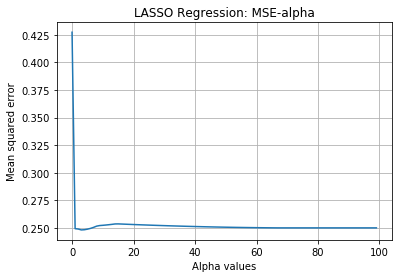

In [0]:
#Evaluate LASSO with Mean squared error
plt.plot(alfa,mse1)
plt.title("LASSO Regression: MSE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean squared error")
plt.grid()
plt.show()

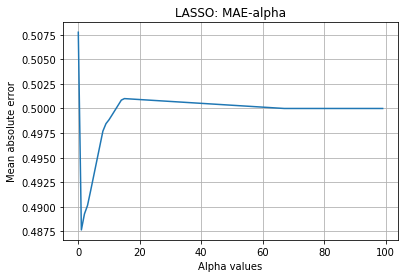

In [0]:
#Evaluate LASSO with Mean absolute error
plt.plot(alfa,mae1)
plt.title("LASSO: MAE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean absolute error")
plt.grid()
plt.show()

In [0]:
# Find alpha for min MSE and run lasso for this alpha.
idx_min1=mse1.index(min(mse1[1:100]))
print(alfa[idx_min1])

3


In [0]:
#Run the  Lasso Regression 
lasso1 = linear_model.Lasso(alpha=alfa[idx_min1],normalize=True)
lasso1.fit(x_train1,y_train1)
y_pred1=lasso1.predict(x_test1)

#Show errors for Ordinary Least Squares regression
print_errors(y_test1, y_pred1, "LASSO best MSE with alpha: %f" %alfa[idx_min1])
print(accuracy_score(y_test1,y_pred1.round())) #genika epeidh einai regression k oxi classification to kano .round() gia na pernoume to pio kontino sto 0 h 1 

For model LASSO best MSE with alpha: 3.000000
Mean absolute error: 0.5
Mean squared error: 0.25
0.6565217391304348


In [0]:
#Run LASSO on various values of a in a range[0,100] every 1 for Wheezles
mse2=[]
mae2=[]
alfa=[]
for a in [x * 1 for x in range(0, 100)]:
    lasso_mae2, lasso_mse2 = getResults(x_train2,y_train2,x_test2,y_test2,a, "LASSO")
    mse2.append(lasso_mse2)
    mae2.append(lasso_mae2)
    alfa.append(a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 585.5494526910053, tolerance: 0.1927
  positive)


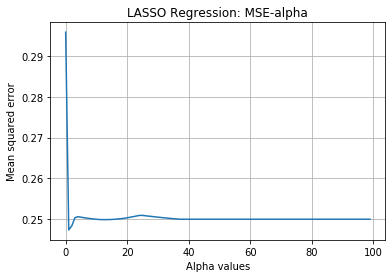

In [0]:
#Evaluate LASSO with Mean squared error
plt.plot(alfa,mse2)
plt.title("LASSO Regression: MSE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean squared error")
plt.grid()
plt.show()

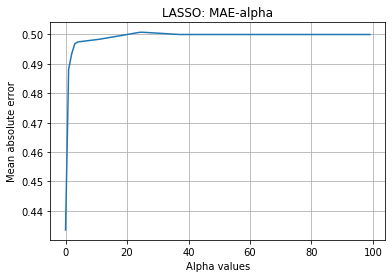

In [0]:
#Evaluate LASSO with Mean absolute error
plt.plot(alfa,mae2)
plt.title("LASSO: MAE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean absolute error")
plt.grid()
plt.show()

In [0]:
# Find alpha for min MSE and run lasso for this alpha.
idx_min2=mse2.index(min(mse2[1:100]))
print(alfa[idx_min2])

1


In [0]:
#Run the  Lasso Regression 
lasso2 = linear_model.Lasso(alpha=alfa[idx_min2],normalize=True)
lasso2.fit(x_train2,y_train2)
y_pred2=lasso2.predict(x_test2)

#Show errors for Ordinary Least Squares regression
print_errors(y_test2, y_pred2, "LASSO best MSE with alpha: %f" %alfa[idx_min2])
print(accuracy_score(y_test2,y_pred2.round())) #genika epeidh einai regression k oxi classification to kano .round() gia na pernoume to pio kontino sto 0 h 1 

For model LASSO best MSE with alpha: 1.000000
Mean absolute error: 0.5
Mean squared error: 0.25
0.7980676328502415


In [0]:
#============================ LOGISTIC REGRESSION ===============================================

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
#Logistic Regression model with multinomial option = ‘lbfgs’ for crackles
log_reg1 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='lbfgs', max_iter=10000, multi_class='auto', verbose=1)
log_reg1.fit(x_train1, y_train1)
y_pred1 = log_reg1.predict(x_test1)


lbfgs_score1 = accuracy_score(y_test1,y_pred1)
print("With solver = ‘lbfgs’, crackles accuracy: %f" %lbfgs_score1)
f1_score1 = f1_score(y_test1,y_pred1, average='weighted')
print("F1 score %f" %f1_score1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


With solver = ‘lbfgs’, crackles accuracy: 0.592271
F1 score 0.598310


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.4s finished


In [0]:
#Logistic Regression model with multinomial option = ‘lbfgs’ for wheezles
log_reg2 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='lbfgs', max_iter=10000, multi_class='auto', verbose=1)
log_reg2.fit(x_train2, y_train2)
y_pred2 = log_reg2.predict(x_test2)


lbfgs_score2 = accuracy_score(y_test2,y_pred2)
print("With solver = ‘lbfgs’, wheezles accuracy: %f" %lbfgs_score2)
f1_score2 = f1_score(y_test2,y_pred2, average='weighted')
print("F1 score %f" %f1_score2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


With solver = ‘lbfgs’, wheezles accuracy: 0.676812
F1 score 0.705318


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.4s finished


In [0]:
#Logistic Regression model with multinomial option = 'liblinear' for crackles
log_reg1 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='liblinear', max_iter=10000, multi_class='auto', verbose=1)
log_reg1.fit(x_train1, y_train1)
y_pred1 = log_reg1.predict(x_test1)


lbfgs_score1 = accuracy_score(y_test1,y_pred1)
print("With solver = liblinear, crackles accuracy: %f" %lbfgs_score1)
f1_score1 = f1_score(y_test1,y_pred1, average='weighted')
print("F1 score %f" %f1_score1)

[LibLinear]With solver = liblinear, crackles accuracy: 0.586957
F1 score 0.593766


In [0]:
#Logistic Regression model with multinomial option = 'liblinear' for wheezles
log_reg2 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='liblinear', max_iter=10000, multi_class='auto', verbose=1)
log_reg2.fit(x_train2, y_train2)
y_pred2 = log_reg2.predict(x_test2)


lbfgs_score2 = accuracy_score(y_test2,y_pred2)
print("With solver = liblinear, wheezles accuracy: %f" %lbfgs_score2)
f1_score2 = f1_score(y_test2,y_pred2, average='weighted')
print("F1 score %f" %f1_score2)

[LibLinear]With solver = liblinear, wheezles accuracy: 0.674396
F1 score 0.703081


In [0]:
#Logistic Regression model with multinomial option = 'newton-cg' for crackles
log_reg1 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='newton-cg', max_iter=10000, multi_class='auto', verbose=1)
log_reg1.fit(x_train1, y_train1)
y_pred1 = log_reg1.predict(x_test1)


lbfgs_score1 = accuracy_score(y_test1,y_pred1)
print("With solver = newton-cg, crackles accuracy: %f" %lbfgs_score1)
f1_score1 = f1_score(y_test1,y_pred1, average='weighted')
print("F1 score %f" %f1_score1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


With solver = newton-cg, crackles accuracy: 0.593237
F1 score 0.599509


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s finished


In [0]:
#Logistic Regression model with multinomial option = 'newton-cg' for wheezles
log_reg2 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='newton-cg', max_iter=10000, multi_class='auto', verbose=1)
log_reg2.fit(x_train2, y_train2)
y_pred2 = log_reg2.predict(x_test2)


lbfgs_score2 = accuracy_score(y_test2,y_pred2)
print("With solver = newton-cg, wheezles accuracy: %f" %lbfgs_score2)
f1_score2 = f1_score(y_test2,y_pred2, average='weighted')
print("F1 score %f" %f1_score2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


With solver = newton-cg, wheezles accuracy: 0.685990
F1 score 0.713154


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.0s finished


In [0]:
#Logistic Regression model with multinomial option = 'sag' for crackles
log_reg1 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='sag', max_iter=10000, multi_class='auto', verbose=1)
log_reg1.fit(x_train1, y_train1)
y_pred1 = log_reg1.predict(x_test1)


lbfgs_score1 = accuracy_score(y_test1,y_pred1)
print("With solver = sag, crackles accuracy: %f" %lbfgs_score1)
f1_score1 = f1_score(y_test1,y_pred1, average='weighted')
print("F1 score %f" %f1_score1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 433 epochs took 5 seconds
With solver = sag, crackles accuracy: 0.585024
F1 score 0.595258


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished


In [0]:
#Logistic Regression model with multinomial option = 'sag' for wheezles
log_reg2 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='sag', max_iter=10000, multi_class='auto', verbose=1)
log_reg2.fit(x_train2, y_train2)
y_pred2 = log_reg2.predict(x_test2)


lbfgs_score2 = accuracy_score(y_test2,y_pred2)
print("With solver = sag, wheezles accuracy: %f" %lbfgs_score2)
f1_score2 = f1_score(y_test2,y_pred2, average='weighted')
print("F1 score %f" %f1_score2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 649 epochs took 10 seconds
With solver = sag, wheezles accuracy: 0.589372
F1 score 0.626995


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s finished


In [0]:
#Logistic Regression model with multinomial option = 'saga' for crackles
log_reg1 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='saga', max_iter=10000, multi_class='auto', verbose=1)
log_reg1.fit(x_train1, y_train1)
y_pred1 = log_reg1.predict(x_test1)


lbfgs_score1 = accuracy_score(y_test1,y_pred1)
print("With solver = saga, crackles accuracy: %f" %lbfgs_score1)
f1_score1 = f1_score(y_test1,y_pred1, average='weighted')
print("F1 score %f" %f1_score1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 480 epochs took 9 seconds
With solver = saga, crackles accuracy: 0.590821
F1 score 0.600876


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s finished


In [0]:
#Logistic Regression model with multinomial option = 'saga' for wheezles
log_reg2 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='saga', max_iter=10000, multi_class='auto', verbose=1)
log_reg2.fit(x_train2, y_train2)
y_pred2 = log_reg2.predict(x_test2)


lbfgs_score2 = accuracy_score(y_test2,y_pred2)
print("With solver = saga, wheezles accuracy: %f" %lbfgs_score2)
f1_score2 = f1_score(y_test2,y_pred2, average='weighted')
print("F1 score %f" %f1_score2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 638 epochs took 12 seconds
With solver = saga, wheezles accuracy: 0.577295
F1 score 0.616414


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.7s finished


In [0]:
#=================================== Linear Discriment Analysis ======================================

In [0]:
#Run LDA with solver='svd' for crackles

lda1 = LinearDiscriminantAnalysis(solver='svd', priors=None, tol=0.1).fit(x_train1, y_train1)
y_pred1 = lda1.predict(x_test1)
lda_score1 = accuracy_score(y_test1,y_pred1)

print("For Crackles, LDA with solver='svd', accuracy: %f" %lda_score1)

For Crackles, LDA with solver='svd', accuracy: 0.581159


In [0]:
#Run LDA with solver='svd' for wheezles

lda2 = LinearDiscriminantAnalysis(solver='svd', priors=None, tol=0.1).fit(x_train2, y_train2)
y_pred2 = lda2.predict(x_test2)
lda_score2 = accuracy_score(y_test2,y_pred2)

print("For Wheezles, LDA with solver='svd', accuracy: %f" %lda_score2)

For Wheezles, LDA with solver='svd', accuracy: 0.667633


In [0]:
#================================== Random Forests ===============================================

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 60, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 1100, 2000]}


In [0]:
# Use the random grid to search for best hyperparameters for Crakcles
# First create the base model to tune
rf1 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model - will use all cores
rf_random.fit(x_train1, y_train1)

In [0]:
rf_random.best_params_

In [0]:
# Use the random grid to search for best hyperparameters for Crackles
# First create the base model to tune
rfcl = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomcl = RandomizedSearchCV(estimator = rfcl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_randomcl.fit(x_train1, y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
rf_randomcl.best_params_

In [0]:

from sklearn.model_selection import cross_val_score
#Run Random Forest Classifier with optimal parameters combination
rfcl = RandomForestClassifier(n_estimators=200, bootstrap=True,
                            max_depth=10, min_samples_split=5, 
                            min_samples_leaf=4, max_features='sqrt')

rfcl_scores = -cross_val_score(rfcl, x_train1, y_train1, cv=10,
                                   scoring='neg_mean_squared_error')
print("Random forests on dataset, estimated MSE: %f (%f)" % (np.mean(rfcl_scores), np.std(rfcl_scores)))

rfcl.fit(x_train1,y_train1)
y_pred1 = rfcl.predict(x_test1)

rfcl_scores = accuracy_score(y_test1,y_pred1)

print("Random Forest Classifier, accuracy: %f" %rfcl_scores)